In [1]:
import numpy as np
import pandas as pd
from typing import Optional, Union, Callable, List
from tensorflow.keras import Model, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D , Layer , Activation
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from keras.applications import Xception
import matplotlib.image as mpimg
import os
import PIL.Image as Image
from tensorflow.keras.utils import plot_model , image_dataset_from_directory
import warnings
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import losses
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
from glob import glob
import cv2
import PIL
import pathlib

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
folder_path = '../input/animal-image-datasetdog-cat-and-panda/animals/animals/'

print('Total cats images:', len(os.listdir(folder_path + 'cats')))
print('Total dogs images:', len(os.listdir(folder_path + 'dogs')))
print('Total pandas images:', len(os.listdir(folder_path + 'panda')))


Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


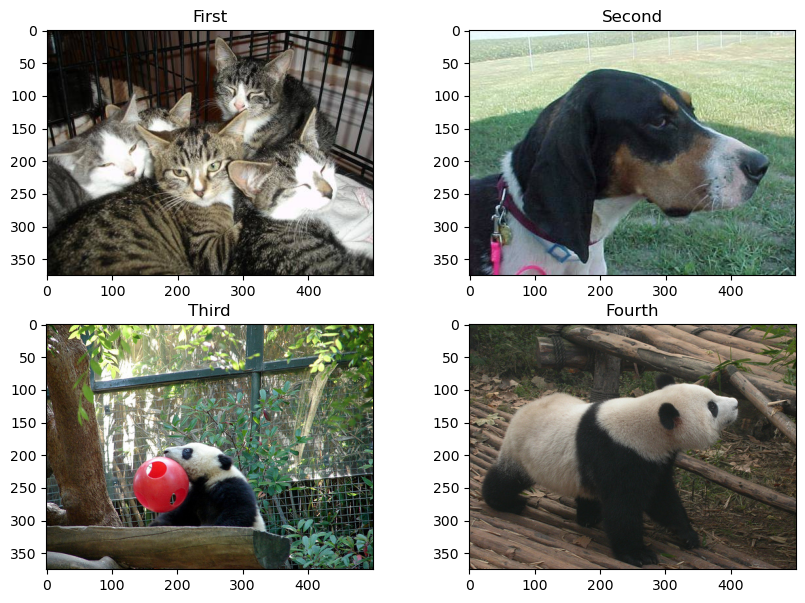

In [3]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

Image1 = Image.open(folder_path + 'cats/cats_00411.jpg')
Image2 = Image.open(folder_path + 'dogs/dogs_00311.jpg')
Image3 = Image.open(folder_path + 'panda/panda_00701.jpg')
Image4 = Image.open(folder_path + 'panda/panda_00103.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

plt.show()

In [4]:
data_dir = pathlib.Path(folder_path)
for image_class in os.listdir(folder_path):
    
    print(image_class)

dogs
panda
cats


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3000


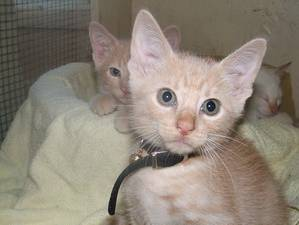

In [6]:
cats = list(data_dir.glob('cats/*'))
PIL.Image.open(str(cats[101]))

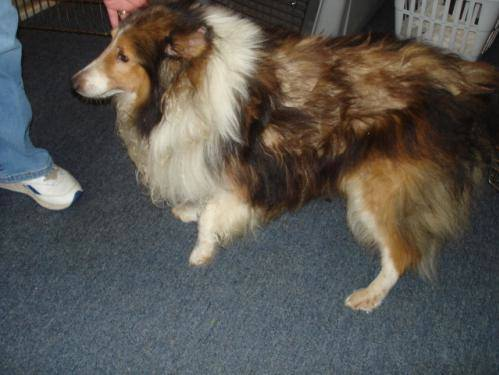

In [7]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[101]))

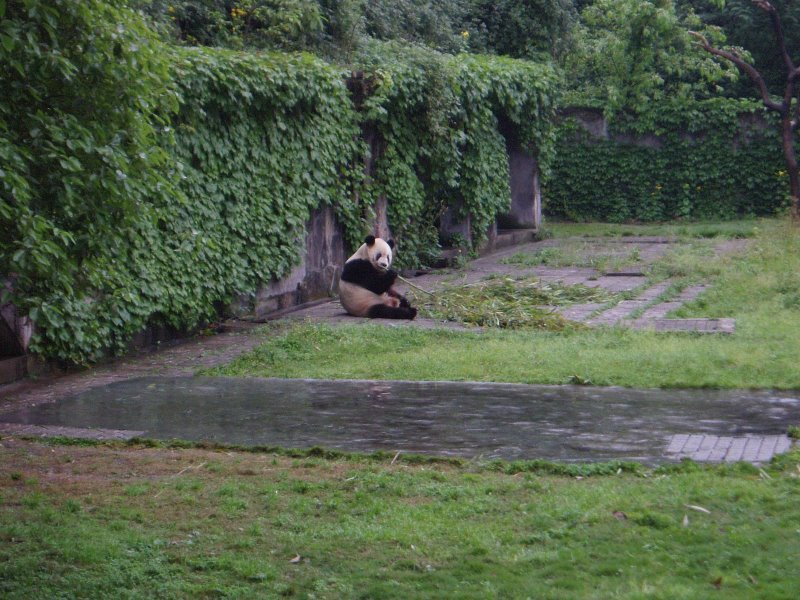

In [8]:
panda = list(data_dir.glob('panda/*'))
PIL.Image.open(str(panda[101]))

In [9]:
batch_size = 32
img_height = 224
img_width = 224

In [10]:
# Train, validation, and test splits
train_generator = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_generator =  tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 3000 files belonging to 3 classes.
Using 2100 files for training.
Found 3000 files belonging to 3 classes.
Using 900 files for validation.


In [11]:
class_names = train_generator.class_names
print(class_names)
num_classes = len(class_names)

['cats', 'dogs', 'panda']


In [12]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


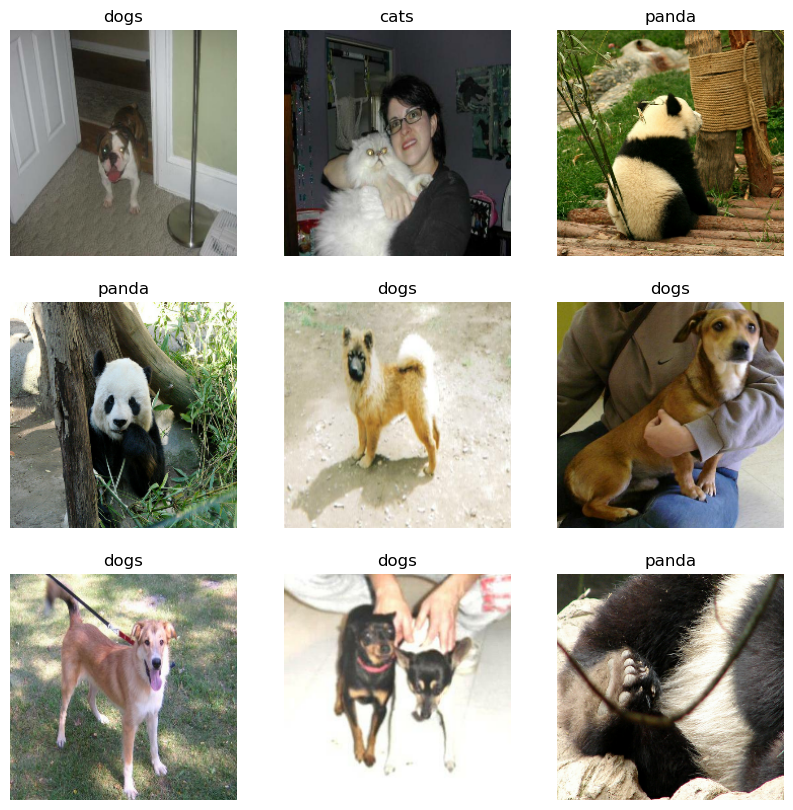

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# **Shuffling Images in Dataset**

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_generator.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_generator = validation_generator.cache().prefetch(buffer_size=AUTOTUNE)

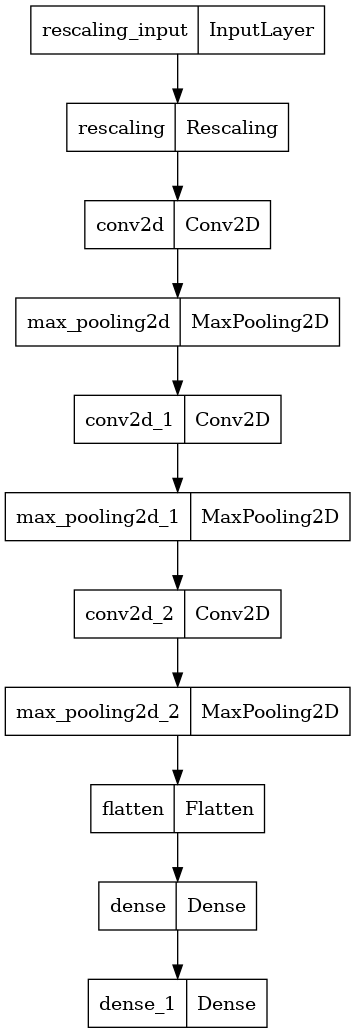

In [15]:
model = keras.models.Sequential([
#Rescaling
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
# First Convolutional Block
layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',input_shape=[128, 128, 3]),
layers.MaxPool2D(),

# Second Convolutional Block
layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
layers.MaxPool2D(),

# Third Convolutional Block
layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
layers.MaxPool2D(),

# Classifier Head
layers.Flatten(),
layers.Dense(units=6, activation="relu"),
layers.Dense(units=1, activation="sigmoid"),
])

plot_model(model)


In [16]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       7

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.2),
  ]
)

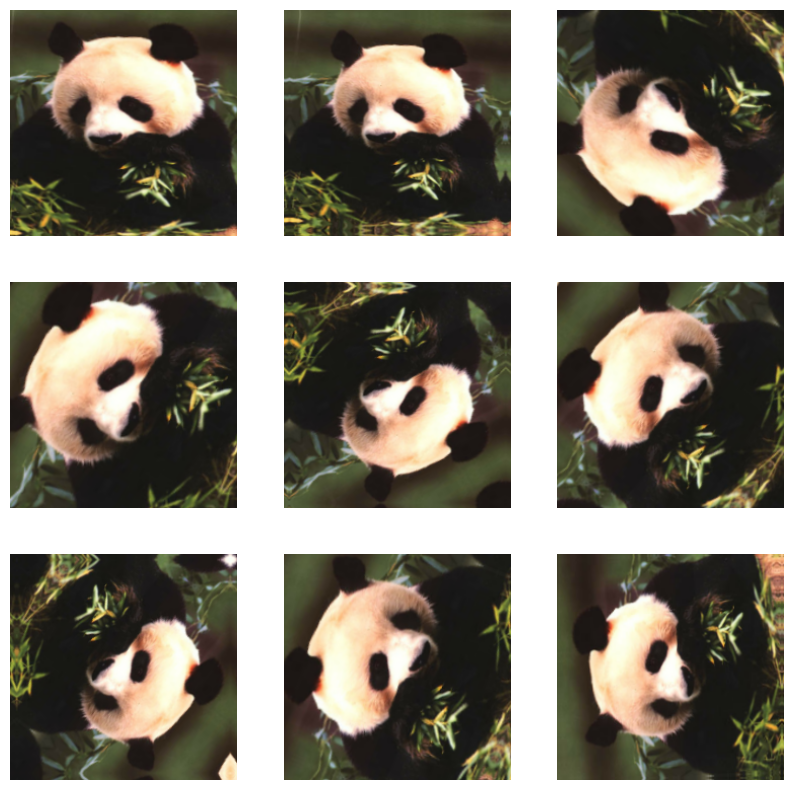

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_generator.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [19]:
model = keras.models.Sequential([
#Rescaling
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
# First Convolutional Block
layers.Conv2D(filters=16, kernel_size=5, activation="relu", padding='same',input_shape=[128, 128, 3]),
layers.MaxPool2D(),

# Second Convolutional Block
layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
layers.MaxPool2D(),

# Third Convolutional Block
layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
layers.MaxPool2D(),

layers.Dropout(0.2),
# Classifier Head
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(num_classes, name="outpus"),
])


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [22]:
epochs = 10
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs
)

Epoch 1/10


2023-07-05 11:25:11.958404: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


66/66 [==============================] - 17s 118ms/step - loss: 0.9249 - accuracy: 0.5410 - val_loss: 0.7262 - val_accuracy: 0.6644
Epoch 2/10
66/66 [==============================] - 3s 50ms/step - loss: 0.7262 - accuracy: 0.6338 - val_loss: 0.6799 - val_accuracy: 0.6822
Epoch 3/10
66/66 [==============================] - 3s 46ms/step - loss: 0.5840 - accuracy: 0.7105 - val_loss: 0.6899 - val_accuracy: 0.6689
Epoch 4/10
66/66 [==============================] - 3s 45ms/step - loss: 0.4733 - accuracy: 0.7976 - val_loss: 0.8135 - val_accuracy: 0.6378
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.3881 - accuracy: 0.8348 - val_loss: 0.8255 - val_accuracy: 0.6778
Epoch 6/10
66/66 [==============================] - 3s 46ms/step - loss: 0.2823 - accuracy: 0.8919 - val_loss: 0.7986 - val_accuracy: 0.6978
Epoch 7/10
66/66 [==============================] - 3s 47ms/step - loss: 0.2081 - accuracy: 0.9167 - val_loss: 1.0008 - val_accuracy: 0.7022
Epoch 8/10
66/66 [====

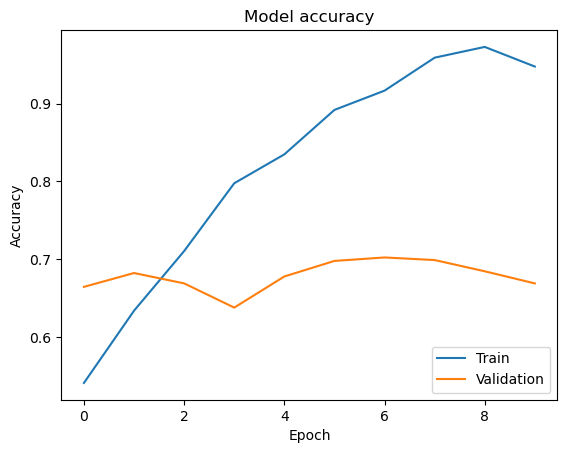

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

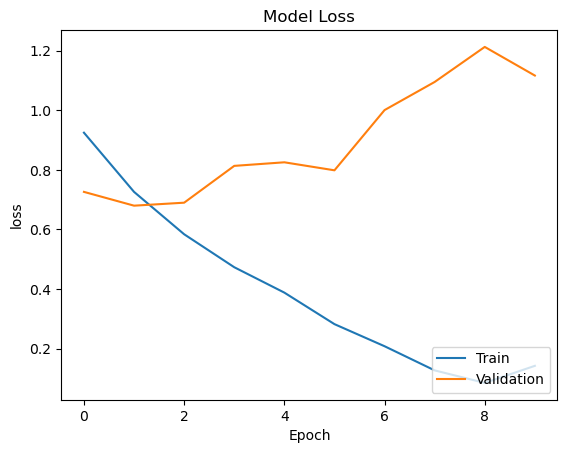

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [25]:
path = "/kaggle/input/animal-image-datasetdog-cat-and-panda/images/panda.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 213ms/step
This image most likely belongs to panda with a 100.00 percent confidence.
